## Time Series Forecasting on airline-passengers dataset

In this project we are going to use airline-passengers dataset for time forecasting using 1.Linear Regression and 2.LSTM and also we are predicting Passengers for next 10 days 

Time series analysis is a statistical method to analyse the past data within a given duration of time to forecast the future. It comprises of ordered sequence of data at equally spaced interval.To understand the time series data & the analysis let us consider an example. Consider an example of Airline Passenger data. It has the count of passenger over a period of time.



importing libraries

In [1]:
import pandas as pd
import numpy as np 
import numpy
import matplotlib.pyplot as plt
# import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# fix random seed for reproducibility

numpy.random.seed(7)

In [2]:
df = pd.read_csv('data.csv')

Text(0.5, 1.0, 'Number of Passengers accoring to Months')

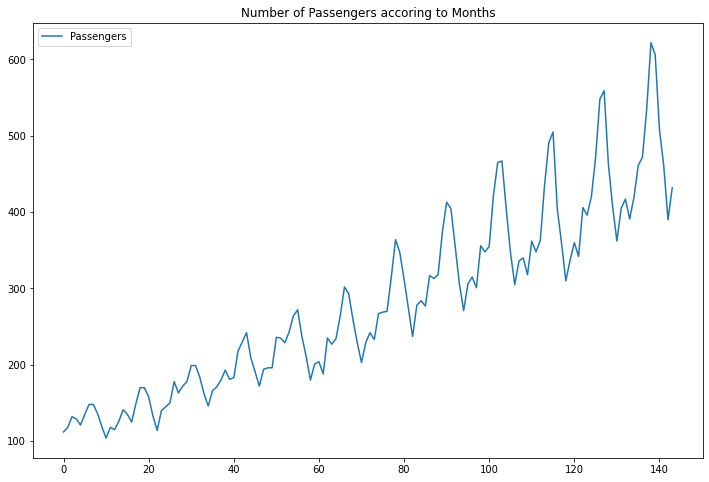

In [98]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df)
plt.title("Number of Passengers accoring to Months")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
df.shape

(144, 2)

In [7]:
dataframe = pd.read_csv('data.csv', usecols=[1], engine='python')
dataset = dataframe.values


In [8]:
dataset[:5]

array([[112],
       [118],
       [132],
       [129],
       [121]], dtype=int64)

In [9]:
dataset.shape

(144, 1)

In [10]:
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [11]:
dataset[:5]

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]], dtype=float32)

#### Now spliting data into training and testing set

In [12]:
dataset.shape

(144, 1)

In [13]:
train_size=len(dataset)*0.65
print(train_size)

93.60000000000001


In [14]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [15]:
train[86:]

array([[0.41119692],
       [0.4034749 ],
       [0.4131274 ],
       [0.52123547],
       [0.5965251 ],
       [0.58108103],
       [0.484556  ],
       [0.3899614 ],
       [0.3223938 ],
       [0.3899614 ]], dtype=float32)

In [16]:
test[:10]

array([[0.4073359 ],
       [0.3803089 ],
       [0.48648646],
       [0.47104248],
       [0.484556  ],
       [0.6138996 ],
       [0.6969112 ],
       [0.70077217],
       [0.57915056],
       [0.46911195]], dtype=float32)

Now before training the data on the LSTM model, we need to prepare the data so that we can fit it on the model, for this task I will define a helper function:

#### Converting array of matrix into a dataset matrix

In [17]:

def create_dataset(timeseries_data, n_features):
    X= []
    y = []
    for i in range(len(timeseries_data)):
        #find the end of this pattern
        end_ix = i + n_features
        
        #check if we are beyond the sequence
        if end_ix > len(timeseries_data) -1:
            break
            
        #gather input and output of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)    

In [18]:
n_steps = 20   
X, y = create_dataset(train, n_steps)
testX, testY = create_dataset(test, n_steps)

In [19]:
X[:3]

array([[[0.01544401],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
        [0.08494207],
        [0.06177607],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123553],
        [0.04247104],
        [0.07142857],
        [0.05984557],
        [0.04054055],
        [0.08687258],
        [0.12741312],
        [0.12741312]],

       [[0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
        [0.08494207],
        [0.06177607],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123553],
        [0.04247104],
        [0.07142857],
        [0.05984557],
        [0.04054055],
        [0.08687258],
        [0.12741312],
        [0.12741312],
        [0.10424709]],

       [[0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
      

In [20]:
y[:2]

array([[0.10424709],
       [0.05598456]], dtype=float32)

In [21]:
X.shape

(76, 20, 1)

## Linear Regression

In [22]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)
    

In [23]:
time_step =20
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [24]:
X_train.shape

(75, 20)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model_lr = LinearRegression()

In [27]:
model_lr.fit(X_train, y_train)

LinearRegression()

#### Predictions and Model Evaluation

In [28]:
predictions_lr = model_lr.predict(X_test)

In [29]:
predictions_lr

array([0.6457977 , 0.4743614 , 0.41465312, 0.47192568, 0.48918307,
       0.4411526 , 0.5494536 , 0.5601001 , 0.6053313 , 0.7579148 ,
       0.8608978 , 0.87030613, 0.68827236, 0.5695729 , 0.47708532,
       0.5354117 , 0.62259495, 0.5738952 , 0.66935694, 0.6271771 ,
       0.7315388 , 0.84831107, 0.97840405, 0.99665165, 0.79518723,
       0.65667474, 0.59157586], dtype=float32)

In [30]:
y_test

array([0.57915056, 0.492278  , 0.3976834 , 0.44980696, 0.49420848,
       0.45945945, 0.5830116 , 0.5637065 , 0.61003864, 0.71042466,
       0.8571429 , 0.8783784 , 0.69305015, 0.5849421 , 0.4980695 ,
       0.58108103, 0.6042471 , 0.554054  , 0.60810804, 0.6891892 ,
       0.71042466, 0.8320464 , 1.        , 0.96911204, 0.7799227 ,
       0.6891892 , 0.55212355], dtype=float32)

In [31]:
print("Acuurancy on training set",model_lr.score(X_train, y_train))

Acuurancy on training set 0.9833235716039256


In [32]:
print("Acuraccy on Testing set",model_lr.score(X_test, y_test))

Acuraccy on Testing set 0.9606967828238719


In [33]:
predictions_lr.shape, y_test.shape

((27,), (27,))

In [34]:
pred_df=pd.DataFrame(predictions_lr, y_test).reset_index()

In [35]:
pred_df_new = pred_df.rename(columns={'index': 'Predictions', 0: 'True_values'})

In [36]:
pred_df_new.head()

,Predictions,True_values
0,0.579151,0.645798
1,0.492278,0.474361
2,0.397683,0.414653
3,0.449807,0.471926
4,0.494208,0.489183


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Predictions VS True Values on Testng set')

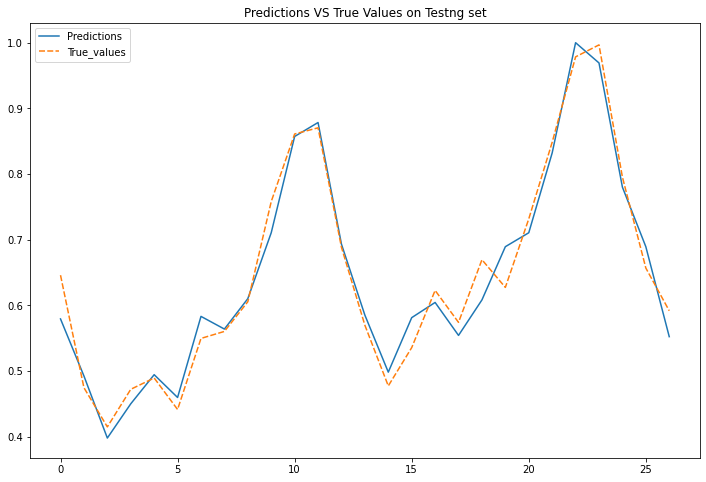

In [39]:
plt.figure(figsize=(12,8))
sns.lineplot(data= pred_df_new)
plt.title("Predictions VS True Values on Testng set")

## 2.LSTM 

#### Reshape from [samples, timesteps] into [samples, timesteps, features]

In [40]:
n_features = 1
X= X.reshape((X.shape[0], X.shape[1], n_features))

In [41]:
X.shape

(76, 20, 1)

### Building LSTM Model

In [42]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences = True, input_shape = (n_steps, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer= 'adam', loss= 'mse')

Fitting the model 

In [43]:
model.fit(X, y, epochs = 200, verbose = 1)

Epoch 1/200
3/3 [==============================] - 3s 24ms/step - loss: 0.0861
Epoch 2/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0611
Epoch 3/200
3/3 [==============================] - 0s 18ms/step - loss: 0.0521
Epoch 4/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0380
Epoch 5/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0263
Epoch 6/200
3/3 [==============================] - 0s 18ms/step - loss: 0.0176
Epoch 7/200
3/3 [==============================] - 0s 23ms/step - loss: 0.0083
Epoch 8/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0128
Epoch 9/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0121
Epoch 10/200
3/3 [==============================] - 0s 17ms/step - loss: 0.0083
Epoch 11/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0084
Epoch 12/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0089
Epoch 13/200
3/3 [==============================]

In [44]:
predictions=model.predict(X)

In [45]:
predictions.shape

(76, 1)

In [46]:
y.shape

(76, 1)

In [47]:
print("Expected Value:",y[10][0])
print('Predicted Value:',predictions[10][0])

Expected Value: 0.18339768
Predicted Value: 0.15460348


#### Predictions for test Data

In [48]:
n_features = 1
testX= testX.reshape((testX.shape[0], testX.shape[1], n_features))

In [49]:
test_predictions=model.predict(testX)

In [50]:
print('Expected value:',testY[10][0])
print('Predicted value:',test_predictions[10][0])

Expected value: 0.8571429
Predicted value: 0.72720706


### Prediting for next 10 days

we are using last 20 days input for 1 day 

In [76]:
test.shape
x_input= test[28:]

In [77]:
# x_input=testX[38:]

In [78]:
x_input.shape

(20, 1)

In [79]:
x_input = x_input.reshape(1, -1)

In [80]:
x_input.shape

(1, 20)

In [81]:
temp_input= list(x_input)
temp_input = temp_input[0].tolist()

In [82]:
len(temp_input)

20

In [83]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<10):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.46279603]
1 day input [0.71042466 0.85714293 0.87837839 0.69305015 0.5849421  0.49806949
 0.58108103 0.60424709 0.55405402 0.60810804 0.6891892  0.71042466
 0.83204639 1.         0.96911204 0.77992272 0.6891892  0.55212355
 0.63320458 0.46279603]
1 day output [[0.4895018]]
2 day input [0.85714293 0.87837839 0.69305015 0.5849421  0.49806949 0.58108103
 0.60424709 0.55405402 0.60810804 0.6891892  0.71042466 0.83204639
 1.         0.96911204 0.77992272 0.6891892  0.55212355 0.63320458
 0.46279603 0.4895018 ]
2 day output [[0.55812895]]
3 day input [0.87837839 0.69305015 0.5849421  0.49806949 0.58108103 0.60424709
 0.55405402 0.60810804 0.6891892  0.71042466 0.83204639 1.
 0.96911204 0.77992272 0.6891892  0.55212355 0.63320458 0.46279603
 0.4895018  0.55812895]
3 day output [[0.6765705]]
4 day input [0.69305015 0.5849421  0.49806949 0.58108103 0.60424709 0.55405402
 0.60810804 0.6891892  0.71042466 0.83204639 1.         0.96911204
 0.77992272 0.6891892  0.55212355 0.63320458 0.46279603 

In [87]:
day_new= np.arange(1,49)
day_pred = np.arange(50, 60)


In [88]:
import matplotlib.pyplot as plt


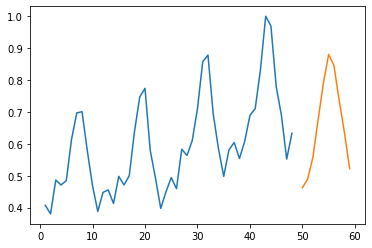

In [90]:
plt.plot(day_new,test)
plt.plot(day_pred,lst_output)

In [91]:
test[35:]

array([[0.58108103],
       [0.6042471 ],
       [0.554054  ],
       [0.60810804],
       [0.6891892 ],
       [0.71042466],
       [0.8320464 ],
       [1.        ],
       [0.96911204],
       [0.7799227 ],
       [0.6891892 ],
       [0.55212355],
       [0.6332046 ]], dtype=float32)

In [92]:
lst_output

[[0.46279603242874146],
 [0.48950180411338806],
 [0.5581289529800415],
 [0.676570475101471],
 [0.7911791205406189],
 [0.8803427815437317],
 [0.8456347584724426],
 [0.7365365028381348],
 [0.6361423134803772],
 [0.5219847559928894]]